In [11]:
from networkx import grid_graph
import networkx as nx
import numpy as np
import random
from matplotlib import colors, cm
import matplotlib.pyplot as plt
#%matplotlib qt
from time import sleep
import matplotlib.animation as animation
from dendropy.calculate import treemeasure
from dendropy import Tree as DTree
from io import StringIO
from random import sample, random, choice
from copy import deepcopy
from math import log
from matplotlib.animation import PillowWriter
from ete3 import Tree, NodeStyle, TreeStyle
import tqdm
from Bio import Phylo
from plot_eteTree import plot_tree
from collections import Counter
import pandas as pd
# Takes a genotype and converts it to an integer for use indexing the fitness landscape list 
def convertGenotypeToInt(genotype):
	out = 0
	for bit in genotype:
		out = (out << 1) | bit
	return out

# Converts an integer to a genotype by taking the binary value and padding to the left by 0s		
def convertIntToGenotype(anInt, pad):
	offset = 2**pad
	return [int(x) for x in bin(offset+anInt)[3:]]	

def flip(allele):
    if allele ==1:
        allele = 0
    else:
        allele =1
        
    return allele



In [12]:

def deathprob(d,m,s, p0,n): 
    y= (1/(1+p0))*(d**n/(d**n+(s*m)))+p0
    return y


def birthprob(m,mh,b0,b_inf,n): 
    y = (b0-b_inf)*(mh/((m)**n+mh))+b_inf
    return y 





def sort_pairs(pair):
    # Extract integer after "r".
    return int(pair[0][1:])
   
def make_tree_from_list(mut_pairs):
    parents = []
    children = []
    pairs_of_mutations = []
    for item in mut_pairs:
        a = 'r'+str(item[0])
        b = 'r'+str(item[1])
        pairs_of_mutations.append((a,b))
    t = Tree() # Creates an empty tree
    r0 = t.add_child(name="r0")
    lookup = {"r0": r0}

    for pair in sorted(pairs_of_mutations, key=sort_pairs):
        parentname = pair[0]
        childname = pair[1]
        if childname not in lookup:
            if parentname in lookup:
                newchild = lookup[parentname].add_child(name = childname)
                lookup.update({childname: newchild})

                parents.append(parentname) #make list of unique terminal nodes (no children of children)
                children.append(newchild)
            else:
                print(pair)
                raise RuntimeError('Must not happen.')

    return t

def make_pruned_tree_from_list(mut_pairs):
    parents = []
    children = []
    pairs_of_mutations = []
    for item in mut_pairs:
        a = 'r'+str(item[0])
        b = 'r'+str(item[1])
        pairs_of_mutations.append((a,b))
    t = Tree() # Creates an empty tree
    r0 = t.add_child(name="r0")
    lookup = {"r0": r0}
    prune_list = ['r0']
    for pair in sorted(pairs_of_mutations, key=sort_pairs):
        parentname = pair[0]
        childname = pair[1]
        if childname not in lookup:
            if parentname in lookup:
                newchild = lookup[parentname].add_child(name = childname)
                lookup.update({childname: newchild})
                if parentname not in parents:
                    prune_list.append(lookup[parentname])
                parents.append(parentname) #make list of unique terminal nodes (no children of children)
                children.append(newchild)
            else:
                print(pair)
                raise RuntimeError('Must not happen.')
    prune_count = Counter(children)
    t.prune(prune_list)
    return t


In [15]:
%%time
ch2, mh2, mp2, cp2=simulation(width=36,length=40,grid=5,mut_rate=10**-2,s =10,p0=.05,n=.5,mh=1,b0=.95,b_inf=.2,n1=.5)

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


CPU times: user 2.54 s, sys: 193 ms, total: 2.74 s
Wall time: 2.8 s


In [9]:
max(max(max(ch2)))

16

In [ ]:
%%time
ch4, mh4,mp4,cp4=simulation(width=18,length=20,grid=5,mut_rate=10**-6,s =10,p0=.05,n=.5,mh=1,b0=.95,b_inf=.2,n1=.5)

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
%%time
ch5, mh5,mp5,cp5=simulation(width=18,length=20,grid=5,mut_rate=10**-8,s =10,p0=.05,n=.5,mh=1,b0=.95,b_inf=.2,n1=.5)

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
np.array(cellhistory).max()

55

In [63]:
40/len(cellhistory)

0.08080808080808081

In [20]:
.001/((4*10**11)/(180*200))

9e-11

In [1]:
t1=make_pruned_tree_from_list(mut_pairs)
#hi = t1.write('newick')
#handle = StringIO(hi)
#t1 = Phylo.read(handle,'newick')

NameError: name 'make_pruned_tree_from_list' is not defined

In [130]:
%matplotlib qt
fig =plt.figure(figsize=(6,11))




ims = []
ax1 = fig.add_subplot(1, 1, 1)
#ax2 = fig.add_subplot(1, 2, 1)


#Phylo.draw(t1,label_func =lambda n: None, branch_labels=lambda n: None,axes=ax2)
norm = colors.Normalize(vmin=-2, vmax=max(max(max(cellhistory))))
hi = ax1.imshow(np.array(cellhistory[-1]).T,interpolation='nearest', origin='lower',norm=norm,cmap='YlGnBu');
for i in range(len(cellhistory)):
    
    ims.append((ax1.imshow(np.array(cellhistory[i]).T, interpolation='nearest', origin='lower',norm=norm,cmap='YlGnBu'),))

    plt.grid(False)
    plt.axis('Off')
    plt.title('Mega Plate CA')
    

cbar = fig.colorbar(hi,ax=ax1, orientation = 'horizontal')

cbar.set_ticks([-1,max(max(max(cellhistory)))])
cbar.set_ticklabels(["Low ",'High'])

cbar.set_label("mutational dist. from WT") 
im_ani = animation.ArtistAnimation(fig, ims,interval=100, repeat_delay=1000,
                                   blit=True)



plt.show()
#im_ani.save('MegaPLate_CA_tree.gif', writer='imagemagick')


In [131]:
im_ani.save('MegaPlate_CA_test.gif', writer='imagemagick');

KeyboardInterrupt: 

In [65]:
mut_rate = [.0002,.0005,.0007,.001]
w = 36
l = 40
g = 5
s = [2,5,20]
p0 = .05
n = [.5,1]
mh = [10,50,100]
b0 = .95
b_inf = .2
n1 = [4,2,.5]

reps = 1
dicts_list = []

for a in range(len(mut_rate)):
    for b in range(len(s)):
        for c in range(len(n)):
            for d in range(len(mh)):
                for e in tqdm.tqdm(range(len(n1))):
        #for d in range(reps):
                    #print('hi')


                    cellhistory,muthistory,mut_pairs, cell_pairs=simulation(width = w,length = l,
                                                                            grid = g,mut_rate= mut_rate[a],
                                                                            s = s[b],p0=p0,n=n[c],mh=mh[d],
                                                                            b0=b0,b_inf=b_inf,n1=n1[e])
                    t = make_tree_from_list(mut_pairs)
                    treePass = t.write(format = 1)
                    DendroTree = DTree.get(data = treePass, schema = 'newick')
                    size = (len([i for i in t.get_leaves()]))
                    time = (len(cellhistory))
                    muts = np.array(cellhistory).max()
                    b1 = treemeasure.B1(DendroTree)
                    n_bar = treemeasure.N_bar(DendroTree)
                    sackin = (treemeasure.sackin_index(DendroTree, normalize = 'yule'))
                    dicts_list.append({"mut_rate":mut_rate[a],"n":n[c],"s":s[b],
                              "mh":mh[d],'n1':n1[e],"size":size,"time":time,"muts":muts,
                              "n_bar":n_bar,"sackin":sackin})








  0%|          | 0/3 [00:00<?, ?it/s]/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until




 33%|███▎      | 1/3 [01:15<02:31, 75.61s/it]



 67%|██████▋   | 2/3 [02:40<01:18, 78.48s/it]



100%|██████████| 3/3 [03:32<00:00, 70.50s/it]







  0%|          | 0/3 [00:00<?, ?it/s]



 33%|███▎      | 1/3 [01:09<02:19, 69.98s/it]



 67%|██████▋   | 2/3 [02:21<01:10, 70.48s/it]



100%|██████████| 3/3 [03:09<00:00, 63.66s/it]







  0%|          | 0/3 [00:00<?, ?it/s]



 33%|███▎      | 1/3 [02:39<05:19, 159.91s/it]



 67%|██████▋   | 2/3 [04:31<02:25, 145.42s/it]



100%|██████████| 3/3 [05:57<00:00, 127.48s/it]







  0%|          | 0/3 [00:00<?, ?it/s]/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is 

 67%|██████▋   | 2/3 [00:26<00:12, 12.64s/it]



100%|██████████| 3/3 [00:34<00:00, 11.43s/it]







  0%|          | 0/3 [00:00<?, ?it/s]



 33%|███▎      | 1/3 [01:33<03:06, 93.29s/it]



 67%|██████▋   | 2/3 [02:35<01:24, 84.02s/it]



100%|██████████| 3/3 [03:51<00:00, 81.57s/it]







  0%|          | 0/3 [00:00<?, ?it/s]



 33%|███▎      | 1/3 [01:01<02:03, 61.60s/it]



 67%|██████▋   | 2/3 [02:41<01:13, 73.22s/it]



100%|██████████| 3/3 [04:01<00:00, 75.12s/it]







  0%|          | 0/3 [00:00<?, ?it/s]



 33%|███▎      | 1/3 [01:18<02:36, 78.40s/it]



 67%|██████▋   | 2/3 [03:09<01:28, 88.26s/it]



100%|██████████| 3/3 [05:01<00:00, 95.23s/it]







  0%|          | 0/3 [00:00<?, ?it/s]



 33%|███▎      | 1/3 [00:10<00:21, 10.90s/it]



 67%|██████▋   | 2/3 [00:21<00:10, 10.87s/it]



100%|██████████| 3/3 [00:27<00:00,  9.24s/it]







  0%|          | 0/3 [00:00<?, ?it/s]



 33%|███▎      | 1/3 [00:06<00:12,  6.48s/it]



 67%|██████▋   | 2/3 [00:20<00:08,  8.72

In [66]:
import shelve


# file to be used
shelf = shelve.open("filename_1.shlf")

# serializing
shelf["my_dict"] =dicts_list

shelf.close()

In [6]:
import shelve

shelf = shelve.open("filename_1.shlf") # the same filename that you used before, please
dicts_list = shelf["my_dict"]
shelf.close()


mut_rate = [.0002,.0005,.0007,.001]
w = 36
l = 40
g = 5
s = [2,5,20]
p0 = .05
n = [.5,1]
mh = [10,50,100]
b0 = .95
b_inf = .2
n1 = [4,2,.5]


In [1]:
e_coli_swarmv = 40
MEGAplatesize = (120/9)*5
mp_swarm_time = MEGAplatesize*10**4/(e_coli_swarmv*3600)
mp_exp_time = 264
mp_swarm_time/mp_exp_time

0.017536475869809203

In [8]:
rslts = pd.DataFrame(dicts_list)

rslts['time_ratio']= 41/rslts['time']
#rslts = rslts[rslts['muts']<120]
#rslts = rslts[rslts['muts']>20]

In [9]:
rslts.sort_values(by='time');

/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


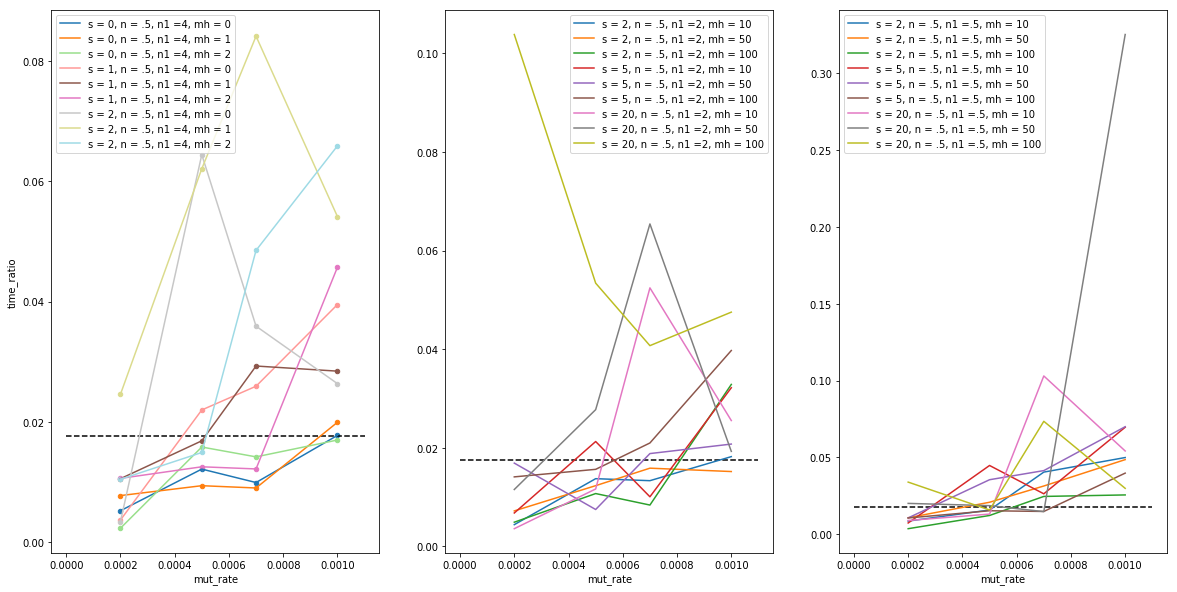

In [10]:
from collections import OrderedDict

fig, axs = plt.subplots(1,3,figsize =(20,10))



for ax in axs.flatten():
    ax.hlines(mp_swarm_time/mp_exp_time,0, max(rslts['mut_rate'])*1.1,label = 'Experimental time from MegaPlate',linestyles = 'dashed')
    
for i in range(len(s)):
    for j in range(len(mh)):
        try:
            rslts[rslts['s']==s[i]][rslts['n1']==4][rslts['n']==.5][rslts['mh']==mh[j]].plot('mut_rate','time_ratio',kind = 'scatter',
                                                                                      color = plt.get_cmap('tab20')(np.linspace(0,8,9).reshape(3,3)[i,j]/8),
                                                                                      ax=axs[0],)
            rslts[rslts['s']==s[i]][rslts['n1']==4][rslts['n']==.5][rslts['mh']==mh[j]].plot('mut_rate','time_ratio',
                                                                                      color = plt.get_cmap('tab20')(np.linspace(0,8,9).reshape(3,3)[i,j]/8),
                                                                                      ax=axs[0],label=('s = {0}, n = .5, n1 =4, mh = {1}'.format(i,j)))
        except:
            None
        
            

            
for i in s:
    for j in mh:
        try:
            rslts[rslts['s']==i][rslts['n1']==2][rslts['n']==.5][rslts['mh']==j].plot('mut_rate','time_ratio',
                                                                                      ax=axs[1],label=('s = {0}, n = .5, n1 =2, mh = {1}'.format(i,j) ))
        except:
            None
            
for i in s:
    for j in mh:
        try:
            rslts[rslts['s']==i][rslts['n1']==.5][rslts['n']==.5][rslts['mh']==j].plot('mut_rate','time_ratio',ax=axs[2],label=('s = {0}, n = .5, n1 =.5, mh = {1}'.format(i,j) ))
        except:
            None
            
            

            
ax
            
            
# for i in s:
#     for j in mh:
#         try:
#             rslts[rslts['s']==i][rslts['n1']==2][rslts['n']==.5][rslts['mh']==j].plot('mut_rate','time_ratio',ax=axs[1],label=('s = {0}, n = .5, n1 =4, mh = {1}'.format(i,j) ))
#         except:
#             None

        

In [ ]:
np.linspace(0,8,9).reshape(3,3)[2,2]/8

In [ ]:
fig, ax = plt.subplots()
rslts[rslts['s']==2][rslts['n1']==4][rslts['n']==.5][rslts['mh']==10].plot('mut_rate','time_ratio',ax=ax,label='hi')
rslts[rslts['s']==5][rslts['n1']==4][rslts['n']==.5][rslts['mh']==10].plot('mut_rate','time_ratio',ax=ax)
rslts[rslts['s']==20][rslts['n1']==4][rslts['n']==.5][rslts['mh']==10].plot('mut_rate','time_ratio',ax=ax)
rslts[rslts['s']==2][rslts['n1']==4][rslts['n']==.5][rslts['mh']==50].plot('mut_rate','time_ratio',ax=ax)
rslts[rslts['s']==5][rslts['n1']==4][rslts['n']==.5][rslts['mh']==50].plot('mut_rate','time_ratio',ax=ax)
rslts[rslts['s']==20][rslts['n1']==4][rslts['n']==.5][rslts['mh']==50].plot('mut_rate','time_ratio',ax=ax)
rslts[rslts['s']==2][rslts['n1']==4][rslts['n']==.5][rslts['mh']==100].plot('mut_rate','time_ratio',ax=ax)
rslts[rslts['s']==5][rslts['n1']==4][rslts['n']==.5][rslts['mh']==100].plot('mut_rate','time_ratio',ax=ax)
rslts[rslts['s']==20][rslts['n1']==4][rslts['n']==.5][rslts['mh']==100].plot('mut_rate','time_ratio',ax=ax)
plt.hlines(mp_swarm_time/mp_exp_time,0, max(rslts['mut_rate'])*1.1)


In [10]:
deathprob(0,0,2,.05,.5)

ZeroDivisionError: float division by zero